# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks 

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective. 


## Acknowledgments

mauricio.antelis@tec.mx

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Importing data

In [2]:
# Load in the data set
df = sns.load_dataset("tips")


# Exploring the content of the data set

Get a general 'feel' of the data


In [3]:
df
#df.shape
#df.head()
#df.columns
#df.describe()

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [4]:
# Number of times that each distinct value of a variable occurs in a data set
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [5]:
# Proportion of each distinct value of a variable occurs in a data set
x = df.day.value_counts()
x / x.sum()

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is XXX. This tells us that there are XXX - XXX = XXX missing values for this variable (other variables may have different numbers of missing values).

In [6]:
# Add a couple of observations to your data frame with some missing values

In [7]:
# Total number of observations in tips
print(df.shape)

# Total number of null observations in tips
print(pd.isnull(df.tip).sum())

# Total number of counts (excluding missing values) in tips
print(df.tip.value_counts().sum())

# Manually sum the frequencies
#print(1621 + 1366 + 1186 + 655 + 643 + 3) 



(244, 7)
0
244


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

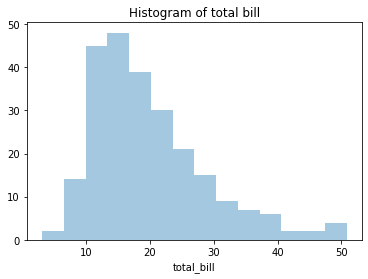

In [8]:
# Plot histogram of the total bill only
sns.distplot(df["total_bill"], kde = False).set_title("Histogram of total bill")
#dfhist.set_ylabel("Frequency")
#dfhist.set_title("Histogram of the total bill")
plt.show()

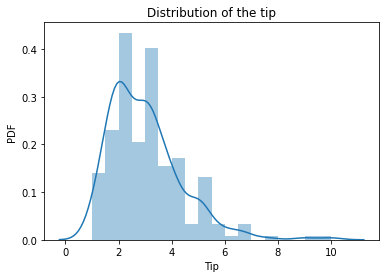

In [9]:
# Plot distribution of the tips only
dfhist = sns.distplot(df["tip"], kde = True)#.set_title("Distribution of the tip")
dfhist.set_ylabel("PDF")
dfhist.set_xlabel("Tip")
dfhist.set_title("Distribution of the tip")

plt.show()

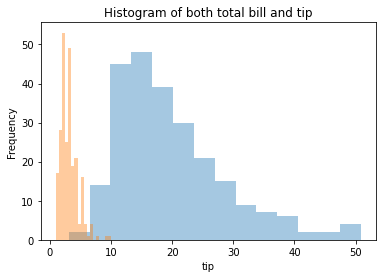

In [10]:
# Plot histogram of both the total bill and the tips
sns.distplot(df["total_bill"], kde = False)
dfhist = sns.distplot(df["tip"], kde = False)#.set_title("Histogram of both total bill and tip")
dfhist.set_ylabel("Frequency")
dfhist.set_title("Histogram of both total bill and tip")

plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

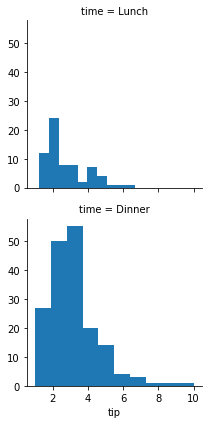

In [11]:
# Create histograms of the "tips" grouped by "time"
g = sns.FacetGrid(df, row = "time")
g = g.map(plt.hist, "tip")

plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

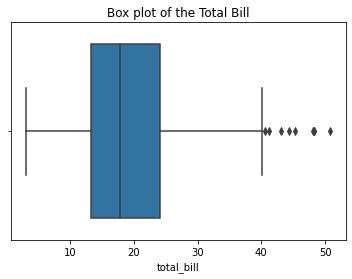

In [12]:
# Create the boxplot of the "total bill" amounts
sns.boxplot(df["total_bill"]).set_title("Box plot of the Total Bill")
plt.show()

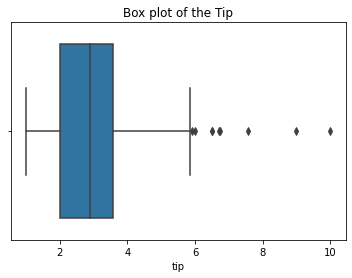

In [13]:
# Create the boxplot of the "tips" amounts
sns.boxplot(df["tip"]).set_title("Box plot of the Tip")
plt.show()

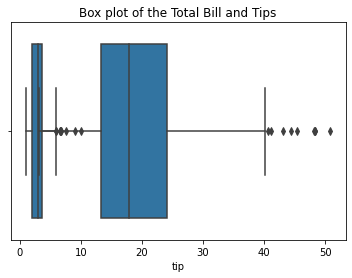

In [14]:
# Create the boxplots of the "total bill" and of the "tips" amounts
sns.boxplot(df["total_bill"])
sns.boxplot(df["tip"]).set_title("Box plot of the Total Bill and Tips")
plt.show()

# NOTE: this is not convenient

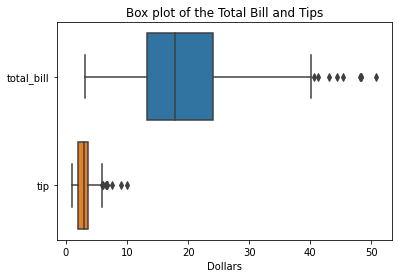

In [15]:
# Create the boxplots of the "total bill" and of the "tips" amounts
BillAndTip = df.loc[:, ["total_bill", "tip"]]

x2bp = sns.boxplot(data=BillAndTip, orient="h")
x2bp.set_xlabel("Dollars")
x2bp.set_title("Box plot of the Total Bill and Tips")

plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

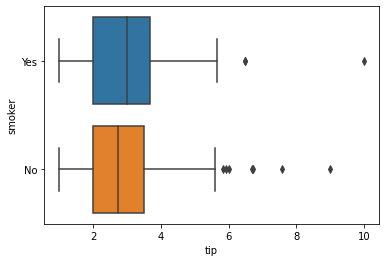

In [16]:
# Create side-by-side boxplots of the "tips" grouped by "smoking status"
sns.boxplot(x = df["tip"], y = df["smoker"])
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


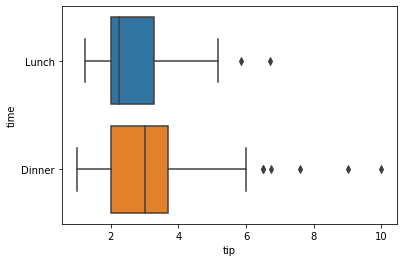

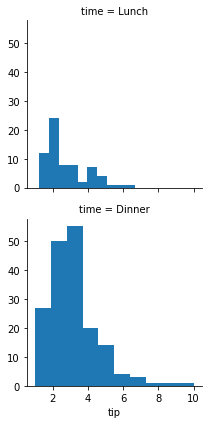

In [17]:
# Create a boxplot and histogram of the "tips" grouped by "time of day"
sns.boxplot(x = df["tip"], y = df["time"])

g = sns.FacetGrid(df, row = "time")
g = g.map(plt.hist, "tip")

plt.show()

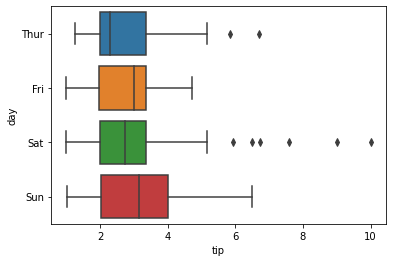

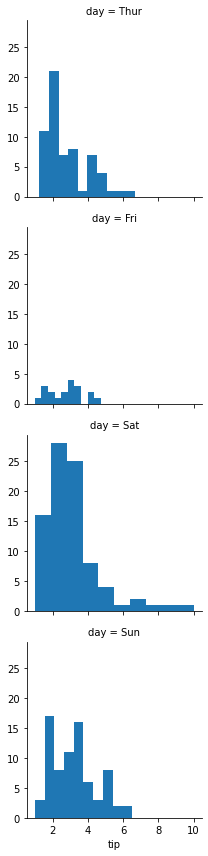

In [18]:
# Create boxplots and histograms of the "tips" grouped by the "day"
sns.boxplot(x = df["tip"], y = df["day"])

g = sns.FacetGrid(df, row = "day")
g = g.map(plt.hist, "tip")
plt.show()